
# fig-rl-perf

Generate a multi panel figure showing RL training performance.


In [55]:

import os

import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt


C:\Users\uqasnosw\AppData\Local\Continuum\miniconda3\envs\python36\lib\site-packages\ipykernel_launcher.py:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


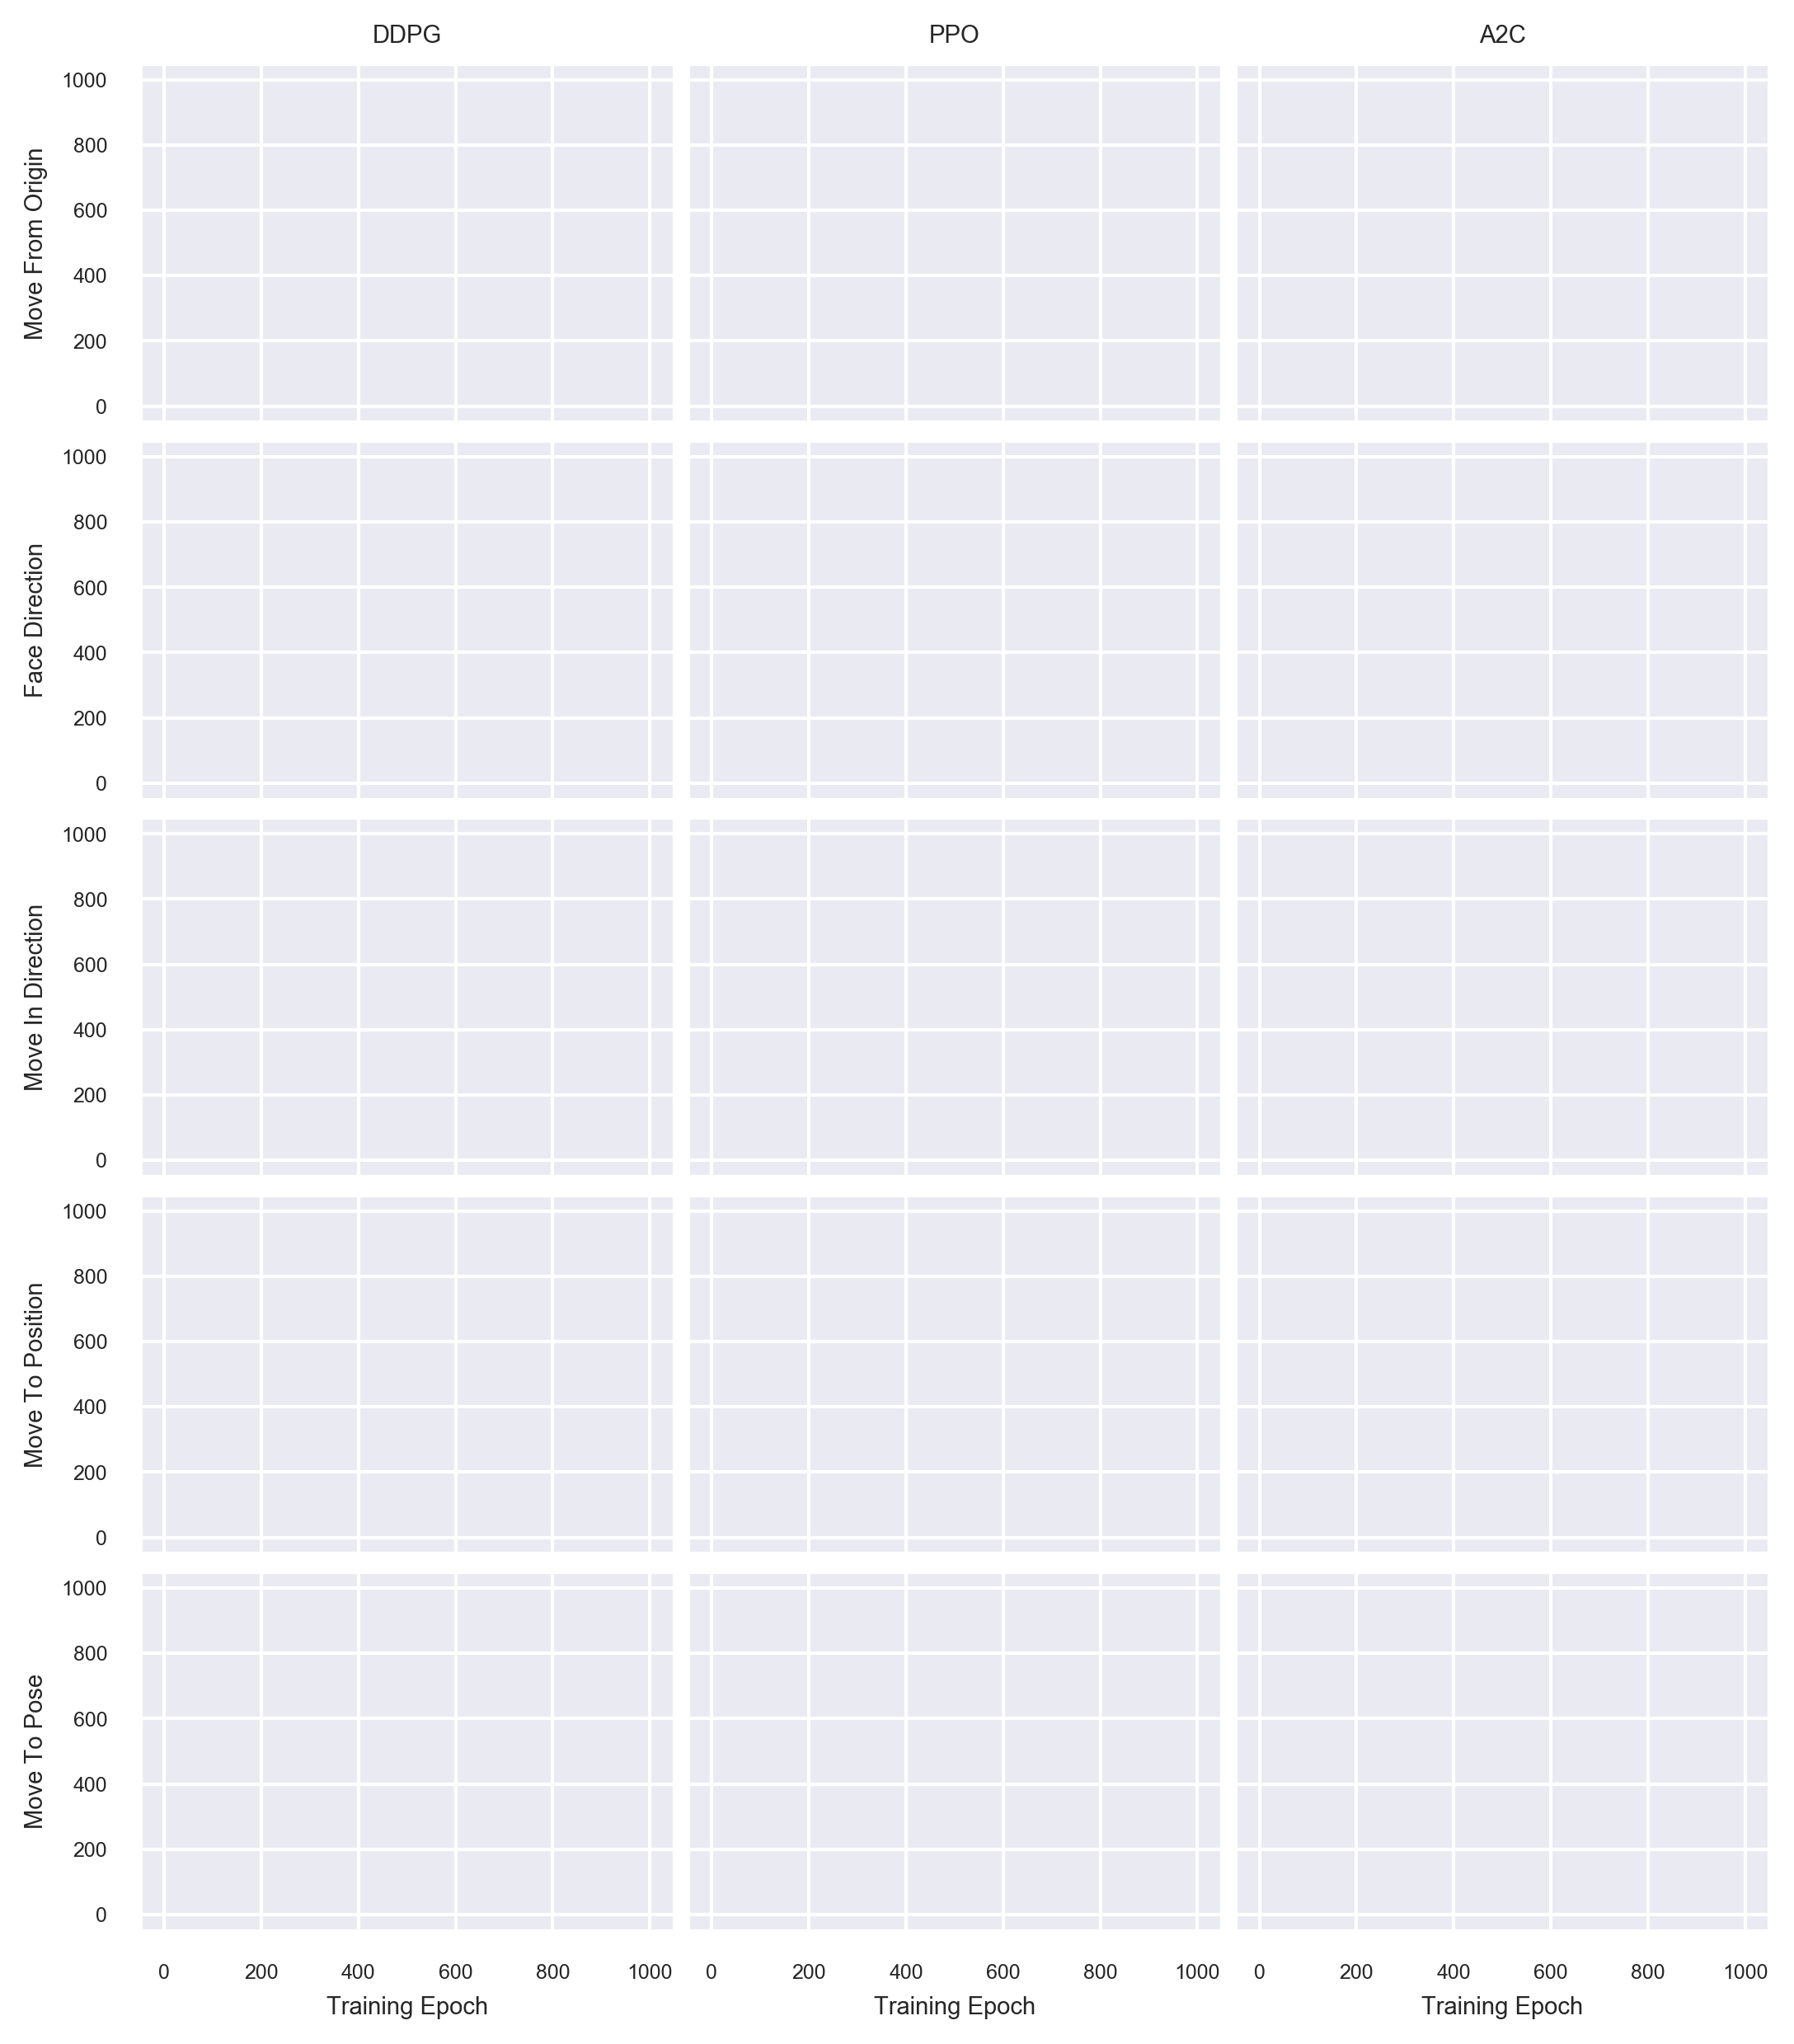

In [58]:

sns.set_style("darkgrid")
#sns.despine()

mpl.rcParams['xtick.labelsize'] = 6
mpl.rcParams['ytick.labelsize'] = 6
mpl.rcParams['axes.titlesize'] = 7
mpl.rcParams['axes.labelsize'] = 7

fig, axes = plt.subplots(
    5,
    3,
    sharex=True,
    sharey=True,
    gridspec_kw=dict(wspace=0.025, hspace=0.05),
    figsize=(8.5, 10),
    dpi=300,
)

axes[0][0].set_xlim(-50, 1050)
axes[0][0].set_ylim(-50, 1050)

axes[0][0].set_ylabel("Move From Origin")
axes[1][0].set_ylabel("Face Direction")
axes[2][0].set_ylabel("Move In Direction")
axes[3][0].set_ylabel("Move To Position")
axes[4][0].set_ylabel("Move To Pose")

axes[4][0].set_xlabel("Training Epoch")
axes[4][1].set_xlabel("Training Epoch")
axes[4][2].set_xlabel("Training Epoch")

axes[0][0].set_title("DDPG")
axes[0][1].set_title("PPO")
axes[0][2].set_title("A2C")

plt.tight_layout()
plt.savefig(
    os.path.join("manuscript", "figures", "fig-rl-perf.pdf"),
    dpi=300,
    bbox_inches='tight',
    pad_inches=0
)
plt.show()
plt.close()
